<a href="https://colab.research.google.com/github/pradyutsingh/Neural-network/blob/master/cat_dog_augmented.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-06-20 20:07:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   151MB/s    in 0.4s    

2020-06-20 20:07:45 (151 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.compile(optimizer=RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
train_gen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range= 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'

)
test_gen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = train_gen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
    
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/50
100/100 - 26s - loss: 0.6937 - accuracy: 0.5120 - val_loss: 0.6849 - val_accuracy: 0.5760
Epoch 2/50
100/100 - 26s - loss: 0.6821 - accuracy: 0.5455 - val_loss: 0.6755 - val_accuracy: 0.5620
Epoch 3/50
100/100 - 26s - loss: 0.6668 - accuracy: 0.5900 - val_loss: 0.6729 - val_accuracy: 0.5450
Epoch 4/50
100/100 - 27s - loss: 0.6645 - accuracy: 0.5860 - val_loss: 0.6665 - val_accuracy: 0.5740
Epoch 5/50
100/100 - 26s - loss: 0.6499 - accuracy: 0.6010 - val_loss: 0.6208 - val_accuracy: 0.6690
Epoch 6/50
100/100 - 26s - loss: 0.6406 - accuracy: 0.6220 - val_loss: 0.6189 - val_accuracy: 0.6560
Epoch 7/50
100/100 - 26s - loss: 0.6330 - accuracy: 0.6375 - val_loss: 0.6043 - val_accuracy: 0.6680
Epoch 8/50
100/100 - 26s - loss: 0.6074 - accuracy: 0.6715 - val_loss: 0.5978 - val_accuracy: 0.6780
Epoch 9/50
100/100 - 26s - loss: 0.6038 - accuracy: 0.6705 - val_loss: 0.5829 - val_accuracy: 0.6650
Epoch 10/50
100/100 - 26s - loss: 0.5954 - accuracy: 0.6825 - val_loss: 0.5907 - val_accura

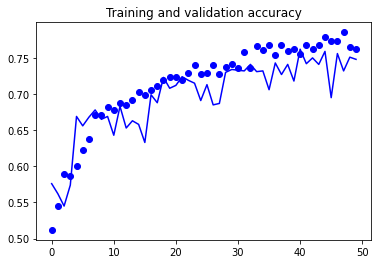

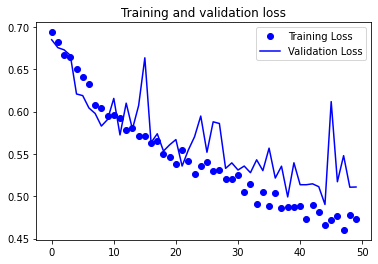

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()